In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
# input_data 안에 있는 "MNIST_data" 디렉토리를 가져옴
# one_hot = True하면 나중에 인코딩 안해줘도 알아서 해서 가져옴

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
nb_classes = 10

In [4]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

In [5]:
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
is_correct = tf.equal(tf.math.argmax(hypothesis, 1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

Instructions for updating:
Use `tf.math.argmax` instead


In [6]:
training_epochs = 15
batch_size = 100

Epoch: 0001	cost = 3.008383918
Epoch: 0002	cost = 1.158040064
Epoch: 0003	cost = 0.908681661
Epoch: 0004	cost = 0.790492846
Epoch: 0005	cost = 0.716646763
Epoch: 0006	cost = 0.665254845
Epoch: 0007	cost = 0.625712838
Epoch: 0008	cost = 0.594574808
Epoch: 0009	cost = 0.569624834
Epoch: 0010	cost = 0.547949457
Epoch: 0011	cost = 0.529933444
Epoch: 0012	cost = 0.514093613
Epoch: 0013	cost = 0.500052176
Epoch: 0014	cost = 0.487431875
Epoch: 0015	cost = 0.476331696
Accuracy: 0.8909
Label: [8]
Prediction [8]


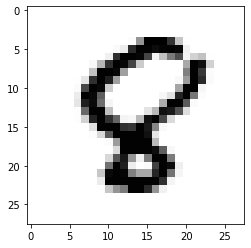

In [7]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)  # 전체 데이터 개수 / 배치 하나의 데이터 양 -> 배치의 개수
        
        for i in range(total_batch):  # total_batch + 1 해야하는거 아닌가..?
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict = {X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
            
        print('Epoch: %04d\tcost = %.9f' %(epoch + 1, avg_cost))
    
    print("Accuracy:", accuracy.eval(session = sess, feed_dict = {X: mnist.test.images, Y: mnist.test.labels}))
    
    import matplotlib.pyplot as plt
    import random
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction", sess.run(tf.argmax(hypothesis, 1), feed_dict = {X: mnist.test.images[r:r + 1]}))
    plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
    plt.show()